C = 0.100 nF
R = 500.000 M ohms
tau = 50.000 ms
(Theoretical)
tau = 50.000 ms
(Experimental)


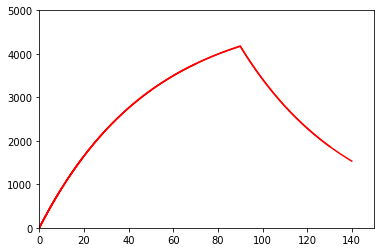

In [3]:
from __future__ import print_function
"""
Created on Wed Apr 22 15:53:00 2015

Charging and discharging curves for passive membrane patch
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# input current
I = 10 # nA

# capacitance and leak resistance

C = 0.1 # nF
R = 500 # M ohms
tau = R*C # = 0.1*100 nF-Mohms = 100*100 pF Mohms = 10 ms
print('C = %.3f nF' % C)
print('R = %.3f M ohms' % R)
print('tau = %.3f ms' % tau)
print('(Theoretical)')

# membrane potential equation dV/dt = - V/RC + I/C

tstop = 150 # ms

V_inf = I*R # peak V (in mV)
tau = 0 # experimental (ms)

h = 0.2 # ms (step size)

V = 0 # mV
V_trace = [V] # mV

for t in np.arange(h, tstop, h):

   # Euler method: V(t+h) = V(t) + h*dV/dt
   V = V +h*(- (V/(R*C)) + (I/C))

   # Verify membrane time constant
   if (not tau and (V > 0.6321*V_inf)):
     tau = t
     print('tau = %.3f ms' % tau)
     print('(Experimental)')

   
   # Stop current injection 
   if t >= 0.6*tstop:
     I = 0

   V_trace += [V]
   if t % 10 == 0:
       plt.plot(np.arange(0,t+h, h), V_trace, color='r')
       plt.xlim(0, tstop)
       plt.ylim(0, V_inf)
       plt.draw()
       
plt.show()

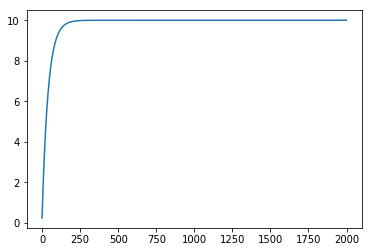

0.0
166.66666666666666


In [40]:
from __future__ import print_function
"""
Created on Wed Apr 22 16:02:53 2015

Basic integrate-and-fire neuron 
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt


# input current
I = 0.250 # nA

# capacitance and leak resistance
C = 1 # nF
R = 40 # M ohms

# I & F implementation dV/dt = - V/RC + I/C
# Using h = 1 ms step size, Euler method

V = 0
tstop = 2000
abs_ref = 5 # absolute refractory period 
ref = 0 # absolute refractory period counter
V_trace = []  # voltage trace for plotting
V_th = 10 # spike threshold
spikes = 0
for t in range(tstop):
  
   if not ref:
       V = V - (V/(R*C)) + (I/C)
   else:
       ref -= 1
       V = 0.2 * V_th # reset voltage
   
   if V > V_th:
       V = 50 # emit spike
       ref = abs_ref # set refractory counter
       spikes += 1
   V_trace += [V]


plt.plot(V_trace)
plt.show()

print(spikes/tstop)
print(1000/6)

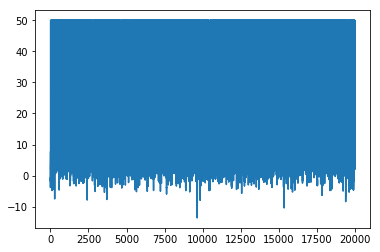

In [36]:
from __future__ import print_function
"""
Created on Wed Apr 22 16:02:53 2015

Basic integrate-and-fire neuron 
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt


# input current
I = 1 # nA

# capacitance and leak resistance
C = 1 # nF
R = 40 # M ohms

# I & F implementation dV/dt = - V/RC + I/C
# Using h = 1 ms step size, Euler method

V = 0
tstop = 20000
abs_ref = 5 # absolute refractory period 
ref = 0 # absolute refractory period counter
V_trace = []  # voltage trace for plotting
V_th = 10 # spike threshold
spiketimes = [] # list of spike times

# input current
noiseamp = 2 # amplitude of added noise
I += noiseamp*np.random.normal(0, 1, (tstop,)) # nA; Gaussian noise

for t in range(tstop):
  
   if not ref:
       V = V - (V/(R*C)) + (I[t]/C)
   else:
       ref -= 1
       V = 0.2 * V_th # reset voltage
   
   if V > V_th:
       V = 50 # emit spike
       ref = abs_ref # set refractory counter
       spiketimes.append(t)
   V_trace += [V]


plt.plot(V_trace)
plt.show()

(array([569., 400., 214.,  79.,  30.,  13.,   8.,   2.,   1.,   3.]),
 array([ 7. , 12.5, 18. , 23.5, 29. , 34.5, 40. , 45.5, 51. , 56.5, 62. ]),
 <a list of 10 Patch objects>)

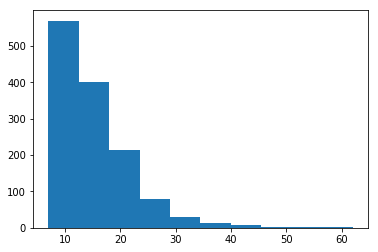

In [30]:
plt.hist(np.diff(spiketimes))